# Data Analysis

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Read the file

In [9]:
df = pd.read_csv('train.csv')

## Drop absolute unnecessary columns

In [10]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

## Imbalance check

transform the satisfaction string category to numerical category for the imbalance check

In [11]:
df['satisfaction'] = df.satisfaction.apply(lambda x: int(1) if x == 'satisfied' else int(0))

the percentage for satisfaction data

In [12]:
print(df.satisfaction.value_counts()/len(df.satisfaction))

0    0.566667
1    0.433333
Name: satisfaction, dtype: float64


###### the data are balance enough, so the data don't to be resampling

## Not Available data analysis

In [13]:
NA_columns = [column for column in df.columns if df[column].isnull().sum() > 0]

the percentage of the NA data

In [14]:
print(df[NA_columns].isnull().sum()/ len(df[NA_columns]))

Arrival Delay in Minutes    0.002984
dtype: float64


see the NA_columns distribution

array([[<AxesSubplot:title={'center':'Arrival Delay in Minutes'}>]],
      dtype=object)

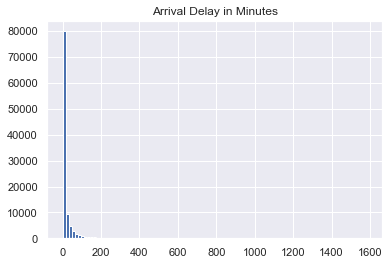

In [15]:
df[NA_columns].hist(bins=100)

###### the distribution very right skewed cause the modus of this columns is 0

see the effect of the nan with the satisfaction, compare to the non nan

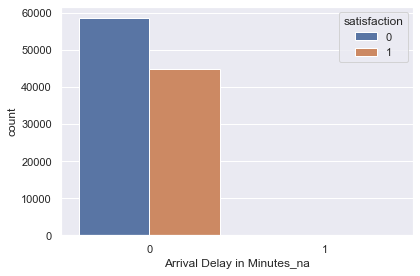

In [16]:
for col in NA_columns:
    df[col + '_na'] = np.where(df[NA_columns].isnull(), 1, 0)
    sns.countplot(col + '_na', data=df, hue='satisfaction' )
    plt.tight_layout()

cause the nan percentage are very small, so I plot the nan here to see the effect

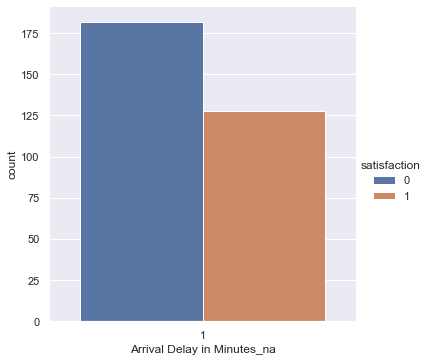

In [17]:
nan_data = df[(df['Arrival Delay in Minutes_na'] == 1)]
sns.catplot('Arrival Delay in Minutes_na', data=nan_data, kind='count', hue='satisfaction' )

###### the plot showed that the nan value is sligthly affect the satisfaction, or even not affecting at all cause the satisfaction percentage are the same in non nan and nan.

drop the 'Arrival Delay in Minutes_na' column

In [18]:
df.drop('Arrival Delay in Minutes_na', axis=1, inplace=True)

## Numeric Columns Analysis

In [19]:
num_columns = [column for column in df.columns if df[column].dtypes != 'O']

in the numeric column, there are two types, discrete and continuous. here I Extract the discrete numeric columns with threshold unique data < 10

### Discrete Numeric Columns

In [20]:
num_columns_discrete = [column for column in num_columns if len(df[column].unique()) <= 10 and column not in ['satisfaction']]

the num_columns _discrete is appropriate according to the dataset as service satisfaction value in each columns

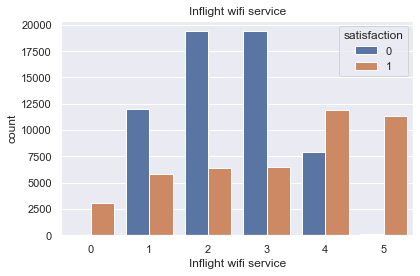

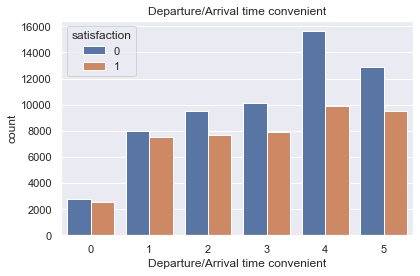

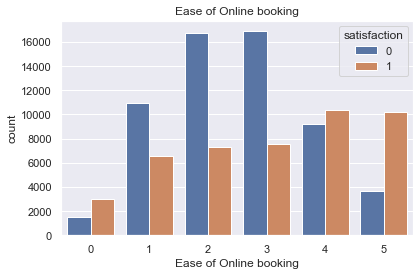

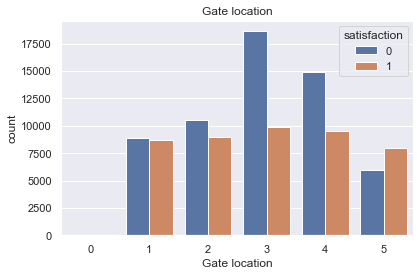

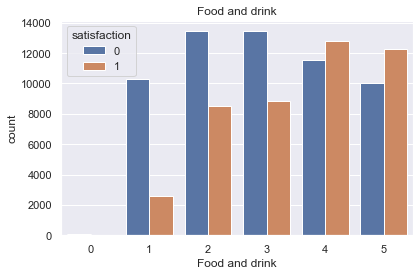

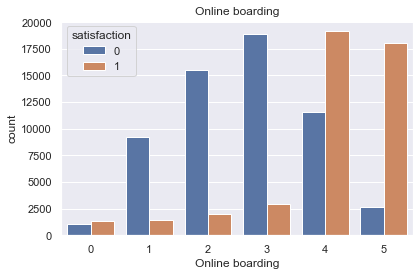

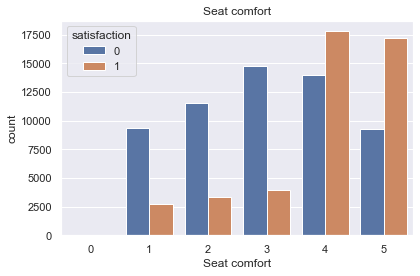

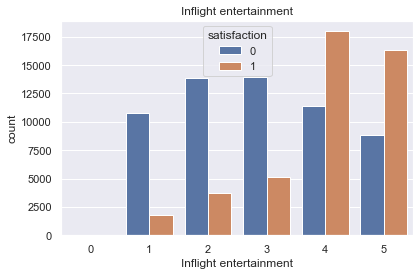

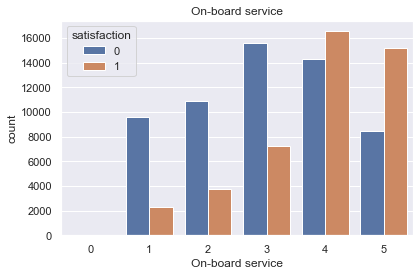

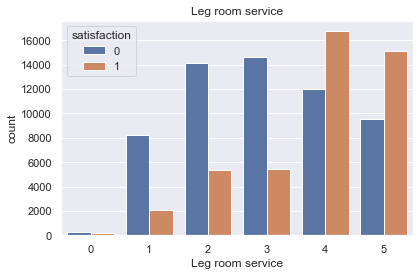

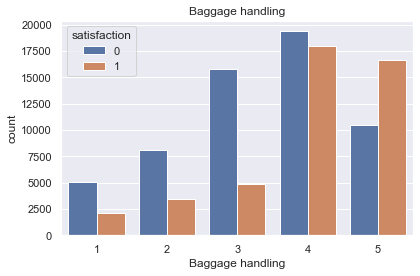

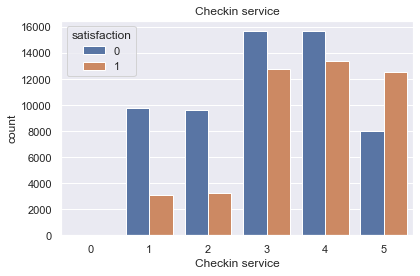

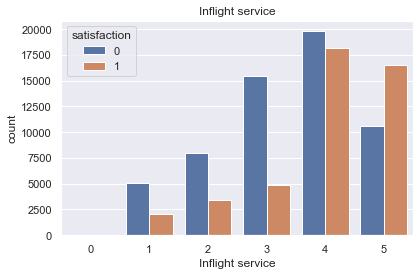

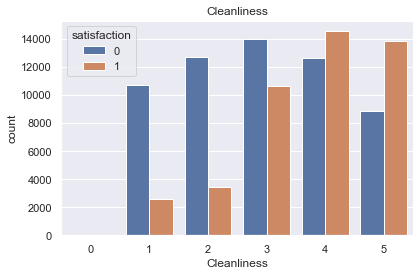

In [21]:
for col in num_columns_discrete:
    plt.figure()
    sns.countplot(col, data=df, hue='satisfaction')
    plt.title(col)
    plt.tight_layout()

###### most of the columns or the features are the same, higher the satisfaction service(1-5) the higher the overall satisfaction. except the gate location shows that there are less important for the satisfaction

### Continuous Numeric Columns

In [22]:
num_columns_continue = [column for column in num_columns if column not in num_columns_discrete and column not in ['satisfaction']] 

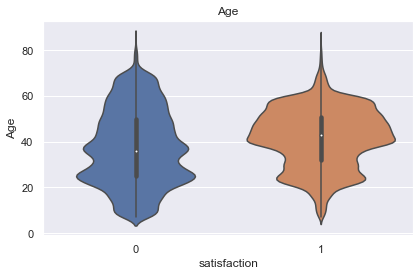

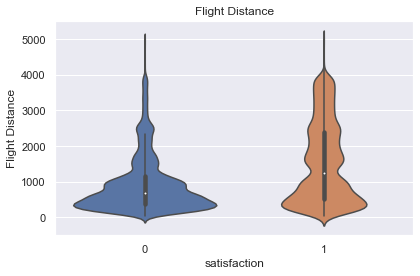

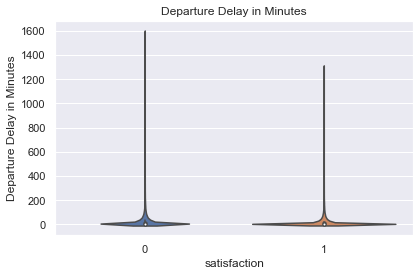

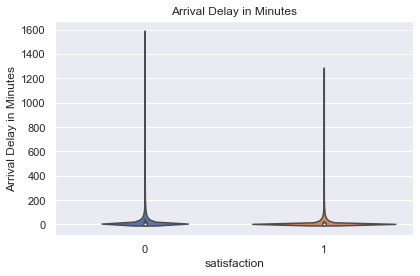

In [23]:
for col in num_columns_continue:
    plt.figure()
    sns.violinplot(y=col, data=df, x='satisfaction')
    plt.title(col)
    plt.tight_layout()

###### Age < 40 tend to not satisfied, while age range for 40 - 60 tend to be satisifed with the airlines. In short range flight distance the passenger tend to not satisfied. In arrival and departure delay, the shorter delay tend to be satisfied the passenger, and vice versa

## Categorical columns analysis

In [24]:
cat_columns = [column for column in df.columns if column not in num_columns]

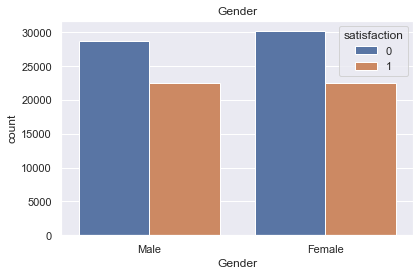

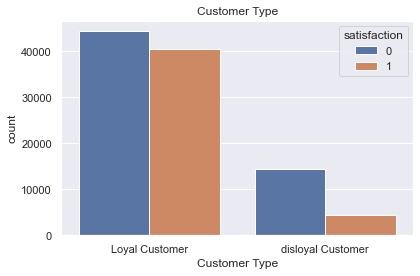

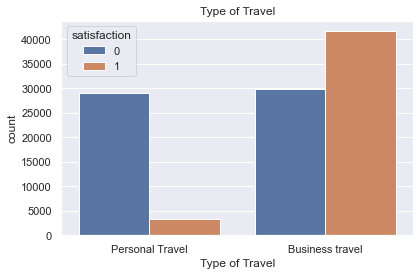

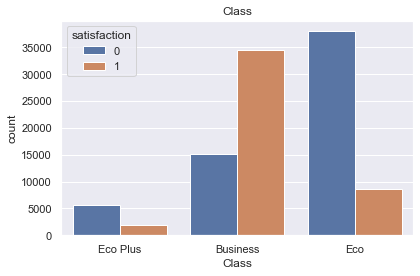

In [25]:
for col in cat_columns:
    plt.figure()
    sns.countplot(col, data=df, hue='satisfaction')
    plt.title(col)
    plt.tight_layout()

###### For the gender and customer type, the data shows that the passenger or customers tend to be same, not satisfied by not looking through gender or customer type. The type of travel and class plot shows that business type and class satisfied with the airlines

## Check the correlation between columns in the data